In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
# Unduh data NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# load file
df = pd.read_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/CleanedSeabank.csv')

In [7]:
# Case folding pada kolom teks (seluruh data)
df['content_casefolding'] = df['content'].str.lower()
df

,content,content_casefolding
0,Bagus,bagus
1,MANTAP.....,mantap.....
2,gk ada saldo minimal,gk ada saldo minimal
3,oke,oke
4,urgent,urgent
...,...,...
3439,terimakasih seabank,terimakasih seabank
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat..."
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ..."


In [8]:
# Menghapus tanda baca dari kolom teks
df['content_remove_punct'] = df['content_casefolding'].str.translate(str.maketrans('', '', string.punctuation))
df
#print("Contoh data setelah remove punctuation :")
#df['Tweet'].loc[0]

,content,content_casefolding,content_remove_punct
0,Bagus,bagus,bagus
1,MANTAP.....,mantap.....,mantap
2,gk ada saldo minimal,gk ada saldo minimal,gk ada saldo minimal
3,oke,oke,oke
4,urgent,urgent,urgent
...,...,...,...
3439,terimakasih seabank,terimakasih seabank,terimakasih seabank
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskantransfer gratis memudahkan bua...
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat...",simpel mudah dan cepat
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ...",saya tidak bisa masuk ke akun sayasaldo saya l...


In [9]:
# Tokenisasi menggunakan split standar
df['content_tokens'] = df['content_remove_punct'].apply(lambda x: x.split() if isinstance(x, str) else [])
df

,content,content_casefolding,content_remove_punct,content_tokens
0,Bagus,bagus,bagus,[bagus]
1,MANTAP.....,mantap.....,mantap,[mantap]
2,gk ada saldo minimal,gk ada saldo minimal,gk ada saldo minimal,"[gk, ada, saldo, minimal]"
3,oke,oke,oke,[oke]
4,urgent,urgent,urgent,[urgent]
...,...,...,...,...
3439,terimakasih seabank,terimakasih seabank,terimakasih seabank,"[terimakasih, seabank]"
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskantransfer gratis memudahkan bua...,"[sangat, memuaskantransfer, gratis, memudahkan..."
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat...",simpel mudah dan cepat,"[simpel, mudah, dan, cepat]"
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[saya, tidak, bisa, masuk, ke, akun, sayasaldo..."


In [10]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
# Melakukan stemming pada kolom tokens
df['content_stemming'] = df['content_tokens'].apply(lambda words: [stemmer.stem(word) for word in words])
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming
0,Bagus,bagus,bagus,[bagus],[bagus]
1,MANTAP.....,mantap.....,mantap,[mantap],[mantap]
2,gk ada saldo minimal,gk ada saldo minimal,gk ada saldo minimal,"[gk, ada, saldo, minimal]","[gk, ada, saldo, minimal]"
3,oke,oke,oke,[oke],[oke]
4,urgent,urgent,urgent,[urgent],[urgent]
...,...,...,...,...,...
3439,terimakasih seabank,terimakasih seabank,terimakasih seabank,"[terimakasih, seabank]","[terimakasih, seabank]"
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskantransfer gratis memudahkan bua...,"[sangat, memuaskantransfer, gratis, memudahkan...","[sangat, memuaskantransfer, gratis, mudah, bua..."
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat...",simpel mudah dan cepat,"[simpel, mudah, dan, cepat]","[simpel, mudah, dan, cepat]"
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[saya, tidak, bisa, masuk, ke, akun, sayasaldo...","[saya, tidak, bisa, masuk, ke, akun, sayasaldo..."


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi'] = df['content_stemming'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi
0,Bagus,bagus,bagus,[bagus],[bagus],bagus
1,MANTAP.....,mantap.....,mantap,[mantap],[mantap],mantap
2,gk ada saldo minimal,gk ada saldo minimal,gk ada saldo minimal,"[gk, ada, saldo, minimal]","[gk, ada, saldo, minimal]",gk ada saldo minimal
3,oke,oke,oke,[oke],[oke],oke
4,urgent,urgent,urgent,[urgent],[urgent],urgent
...,...,...,...,...,...,...
3439,terimakasih seabank,terimakasih seabank,terimakasih seabank,"[terimakasih, seabank]","[terimakasih, seabank]",terimakasih seabank
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskantransfer gratis memudahkan bua...,"[sangat, memuaskantransfer, gratis, memudahkan...","[sangat, memuaskantransfer, gratis, mudah, bua...",sangat memuaskantransfer gratis mudah buat kit...
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat...",simpel mudah dan cepat,"[simpel, mudah, dan, cepat]","[simpel, mudah, dan, cepat]",simpel mudah dan cepat
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[saya, tidak, bisa, masuk, ke, akun, sayasaldo...","[saya, tidak, bisa, masuk, ke, akun, sayasaldo...",saya tidak bisa masuk ke akun sayasaldo saya l...


In [15]:
data = pd.read_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/CleanedSeabank.csv')
text_column = df['content_normalisasi'].dropna().str.cat(sep=' ')

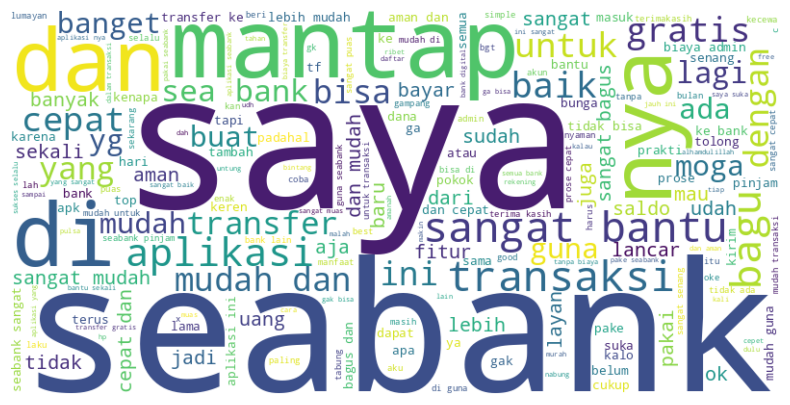

In [16]:
#wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_column)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Mendapatkan frekuensi kata dari word cloud
word_freq = wordcloud.words_

# Mengurutkan frekuensi kata secara menurun
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Membuat array dari kata-kata yang sering muncul
top_words = [word for word, freq in sorted_word_freq]

# Menampilkan array kata-kata yang sering muncul
print(top_words)

['saya', 'seabank', 'mantap', 'di', 'nya', 'dan', 'sangat bantu', 'transaksi', 'bagu', 'aplikasi', 'baik', 'gratis', 'cepat', 'untuk', 'dengan', 'mudah dan', 'bisa', 'ini', 'transfer', 'yang', 'sea bank', 'lagi', 'banget', 'buat', 'moga', 'yg', 'mudah', 'ada', 'guna', 'sangat mudah', 'tidak', 'juga', 'aman', 'saldo', 'sangat', 'sangat bagus', 'dan mudah', 'jadi', 'bayar', 'mau', 'sekali', 'lancar', 'baru', 'uang', 'fitur', 'banyak', 'ok', 'sudah', 'lebih', 'udah', 'cepat dan', 'dari', 'aja', 'layan', 'pakai', 'biaya admin', 'tapi', 'prose', 'lama', 'bank', 'top', 'ya', 'seabank sangat', 'bantu', 'pinjam', 'suka', 'lebih mudah', 'bagus dan', 'ga', 'keren', 'terus', 'semua', 'belum', 'hari', 'kirim', 'dapat', 'pake', 'apk', 'masuk', 'kenapa', 'dan cepat', 'mudah guna', 'aman dan', 'transfer ke', 'dana', 'tf', 'apa', 'senang', 'sama', 'karena', 'ke bank', 'tolong', 'atau', 'aplikasi ini', 'ke', 'cukup', 'padahal', 'pokok', 'prakti', 'tidak bisa', 'gak', 'bunga', 'kalo', 'tambah', 'seabank

In [18]:
# Daftar kata stopword tambahan
additional_stopwords = ['blubaca', 'blu', 'blu bca', 'bca']
# Ambil daftar stopwords bahasa Indonesia dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Tambahkan kata-kata stopword tambahan ke dalam set stop_words
stop_words.update(additional_stopwords)

# Lakukan stopword removal pada kolom 'Tweet_tokens' dan simpan hasilnya pada kolom 'Tweet_stopword'
df['content_stopword'] = df['content_tokens'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

# Tampilkan DataFrame yang sudah diperbarui
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword
0,Bagus,bagus,bagus,[bagus],[bagus],bagus,[bagus]
1,MANTAP.....,mantap.....,mantap,[mantap],[mantap],mantap,[mantap]
2,gk ada saldo minimal,gk ada saldo minimal,gk ada saldo minimal,"[gk, ada, saldo, minimal]","[gk, ada, saldo, minimal]",gk ada saldo minimal,"[gk, saldo, minimal]"
3,oke,oke,oke,[oke],[oke],oke,[oke]
4,urgent,urgent,urgent,[urgent],[urgent],urgent,[urgent]
...,...,...,...,...,...,...,...
3439,terimakasih seabank,terimakasih seabank,terimakasih seabank,"[terimakasih, seabank]","[terimakasih, seabank]",terimakasih seabank,"[terimakasih, seabank]"
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskantransfer gratis memudahkan bua...,"[sangat, memuaskantransfer, gratis, memudahkan...","[sangat, memuaskantransfer, gratis, mudah, bua...",sangat memuaskantransfer gratis mudah buat kit...,"[memuaskantransfer, gratis, memudahkan, kitate..."
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat...",simpel mudah dan cepat,"[simpel, mudah, dan, cepat]","[simpel, mudah, dan, cepat]",simpel mudah dan cepat,"[simpel, mudah, cepat]"
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[saya, tidak, bisa, masuk, ke, akun, sayasaldo...","[saya, tidak, bisa, masuk, ke, akun, sayasaldo...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[masuk, akun, sayasaldo, lumayan, didalam, but..."


In [19]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi2'] = df['content_stopword'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword,content_normalisasi2
0,Bagus,bagus,bagus,[bagus],[bagus],bagus,[bagus],bagus
1,MANTAP.....,mantap.....,mantap,[mantap],[mantap],mantap,[mantap],mantap
2,gk ada saldo minimal,gk ada saldo minimal,gk ada saldo minimal,"[gk, ada, saldo, minimal]","[gk, ada, saldo, minimal]",gk ada saldo minimal,"[gk, saldo, minimal]",gk saldo minimal
3,oke,oke,oke,[oke],[oke],oke,[oke],oke
4,urgent,urgent,urgent,[urgent],[urgent],urgent,[urgent],urgent
...,...,...,...,...,...,...,...,...
3439,terimakasih seabank,terimakasih seabank,terimakasih seabank,"[terimakasih, seabank]","[terimakasih, seabank]",terimakasih seabank,"[terimakasih, seabank]",terimakasih seabank
3440,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskan..transfer gratis memudahkan b...,sangat memuaskantransfer gratis memudahkan bua...,"[sangat, memuaskantransfer, gratis, memudahkan...","[sangat, memuaskantransfer, gratis, mudah, bua...",sangat memuaskantransfer gratis mudah buat kit...,"[memuaskantransfer, gratis, memudahkan, kitate...",memuaskantransfer gratis memudahkan kitaterima...
3441,"Simpel, mudah dan cepat...","simpel, mudah dan cepat...",simpel mudah dan cepat,"[simpel, mudah, dan, cepat]","[simpel, mudah, dan, cepat]",simpel mudah dan cepat,"[simpel, mudah, cepat]",simpel mudah cepat
3442,"Saya tidak bisa masuk ke akun saya,saldo saya ...","saya tidak bisa masuk ke akun saya,saldo saya ...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[saya, tidak, bisa, masuk, ke, akun, sayasaldo...","[saya, tidak, bisa, masuk, ke, akun, sayasaldo...",saya tidak bisa masuk ke akun sayasaldo saya l...,"[masuk, akun, sayasaldo, lumayan, didalam, but...",masuk akun sayasaldo lumayan didalam butuh dan...


In [20]:
df.drop(df.columns[[0,1,2,3,4,5,6]], axis = 1, inplace = True)
df.head()

,content_normalisasi2
0,bagus
1,mantap
2,gk saldo minimal
3,oke
4,urgent


In [21]:
# Menyimpan data yang telah dibersihkan
df.to_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/ProsessedSeabank.csv', index=False)